# Handling audio data in Python part one

There are a number of different libraries which can assist in the handling of audio in Python.

In this case we'll be using scipy.io for audio I/O, part of the [SciPy](http://www.scipy.org/) package.

The audio sample data is stored in familiar NumPy arrays.

I'd also recommend installing [Audacity](http://audacity.sourceforge.net/) so you can easily audition/edit any audio files

## Reading audio data

Now we are going to load in a 16 bit uncompressed wave file.

First we'll get our initial imports in:

In [7]:
%matplotlib inline
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import mpld3

These calls enable the mpld3 render engine on this notebook and increase the plot size

In [8]:
mpld3.enable_notebook()
pylab.rcParams['figure.figsize'] = 15, 8
pylab.rcParams['font.size'] = 16

Then we read the audio data where samplerate = sample rate and samples = the audio sample data:

In [3]:
fs, samples = wavfile.read('audio/1k.wav')

The audio is sampled at 44,100 times per second (Hz), so we have 44,100 sample values/second of audio, with 1 channel (mono) of 3 seconds in length

In [4]:
print 'Sample rate: ', fs, 'Hz'
print 'Length in samples: ', len(samples)
print 'Length in seconds: ', '%.3f' % (float(len(samples)) / fs)

Sample rate:  44100 Hz
Length in samples:  132300
Length in seconds:  3.000


Now output the first 100 audio sample values to get a feel for the data

In [5]:
print samples[0:100]

[     0   4653   9212  13583  17680  21418  24722  27526  29771  31413
  32420  32767  32452  31479  29868  27652  24875  21594  17877  13796
   9435   4883    233  -4422  -8988 -13371 -17482 -21241 -24569 -27398
 -29673 -31346 -32385 -32766 -32485 -31543 -29963 -27776 -25026 -21769
 -18071 -14007  -9658  -5114   -467   4190   8762  13157  17285  21063
  24414  27270  29574  31278  32348  32764  32513  31606  30057  27900
  25177  21943  18266  14218   9882   5345    701  -3959  -8537 -12943
 -17086 -20883 -24258 -27140 -29472 -31207 -32310 -32758 -32542 -31666
 -30150 -28021 -25326 -22116 -18458 -14428 -10104  -5575   -933   3726
   8312  12728  16887  20703  24099  27009  29369  31135  32271  32750]


The audio sample data is in the form of signed 16 bit integers with a range of possible values between -32768 and +32767

In [6]:
print 'Sample data type: ', samples.dtype

Sample data type:  int16


Plot the first 100 samples of audio data with markers at each sample point

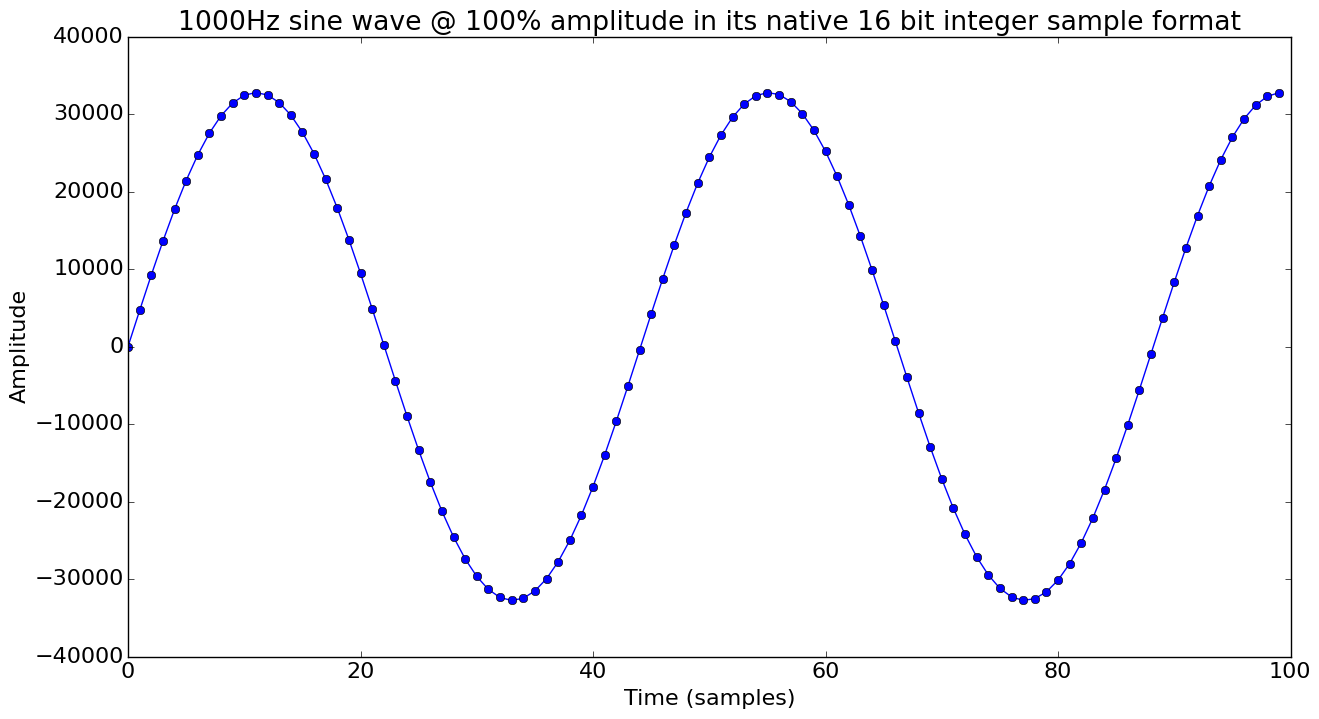

In [9]:
plt.plot(samples[0:100], marker='o')
plt.title('1000Hz sine wave @ 100% amplitude in its native 16 bit integer sample format')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

It'll be easier to work with the data in a floating point format, where each sample can be a value between -1 and +1

In [10]:
samples = samples / 32768.0

Now output the first 100 audio sample values

In [11]:
print samples[0:100]

[ 0.          0.14199829  0.28112793  0.41452026  0.53955078  0.65362549
  0.75445557  0.84002686  0.90853882  0.95864868  0.98937988  0.99996948
  0.99035645  0.96066284  0.91149902  0.84387207  0.75912476  0.65899658
  0.54556274  0.42102051  0.28793335  0.14901733  0.0071106  -0.13494873
 -0.27429199 -0.40805054 -0.5335083  -0.64822388 -0.74978638 -0.83612061
 -0.9055481  -0.956604   -0.98831177 -0.99993896 -0.99136353 -0.96261597
 -0.91439819 -0.84765625 -0.76373291 -0.66433716 -0.55148315 -0.42745972
 -0.29473877 -0.15606689 -0.01425171  0.12786865  0.26739502  0.40151978
  0.52749634  0.64279175  0.74505615  0.83221436  0.90252686  0.95452881
  0.98718262  0.99987793  0.99221802  0.96453857  0.91726685  0.85144043
  0.76834106  0.66964722  0.55743408  0.43389893  0.30157471  0.16311646
  0.02139282 -0.12081909 -0.26052856 -0.39498901 -0.52142334 -0.63729858
 -0.74029541 -0.82824707 -0.89941406 -0.95236206 -0.98602295 -0.99969482
 -0.99310303 -0.96636963 -0.92010498 -0.85513306 -0

The audio sample data is now stored as 64 bit floating point values between -1 and +1

In [12]:
print 'Sample data type: ', samples.dtype

Sample data type:  float64


Plot the first 100 samples of audio data with markers at each sample point in its new format

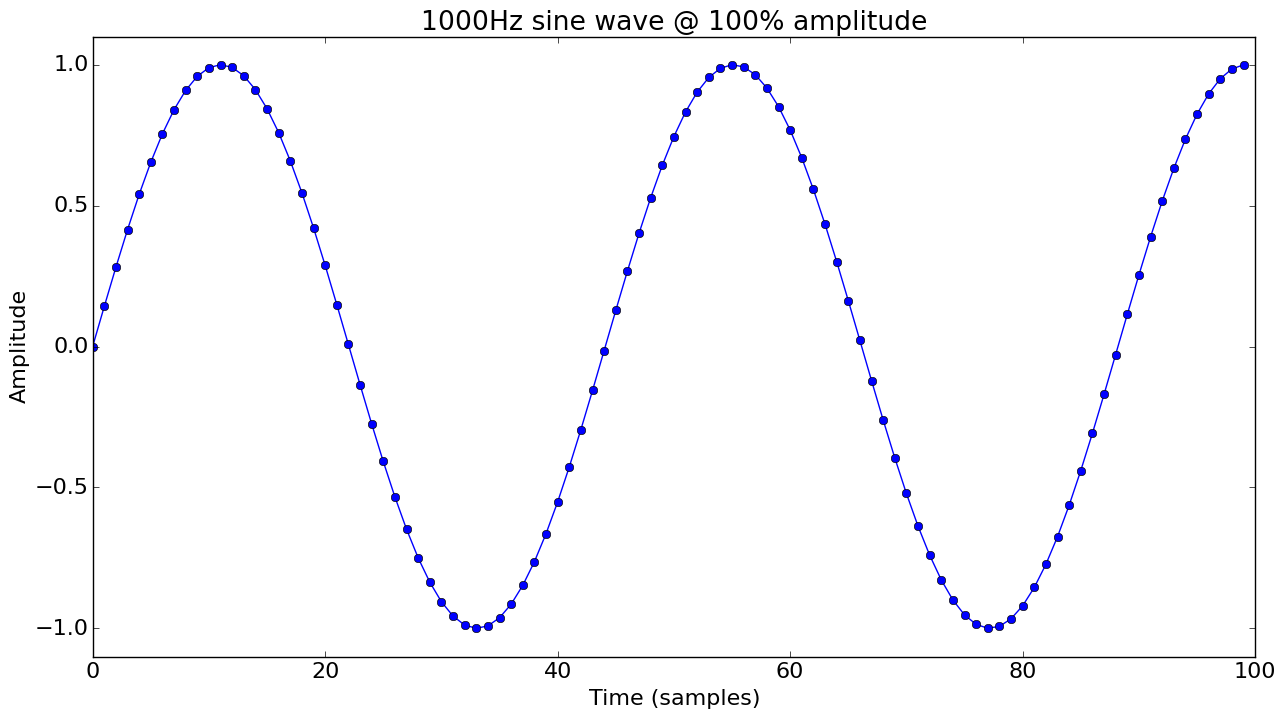

In [13]:
plt.plot(samples[0:100], marker='o')
plt.ylim([-1.1, 1.1])
plt.title('1000Hz sine wave @ 100% amplitude')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.savefig('test.pdf')

Reduce the samples amplitude by 50% and re-plot

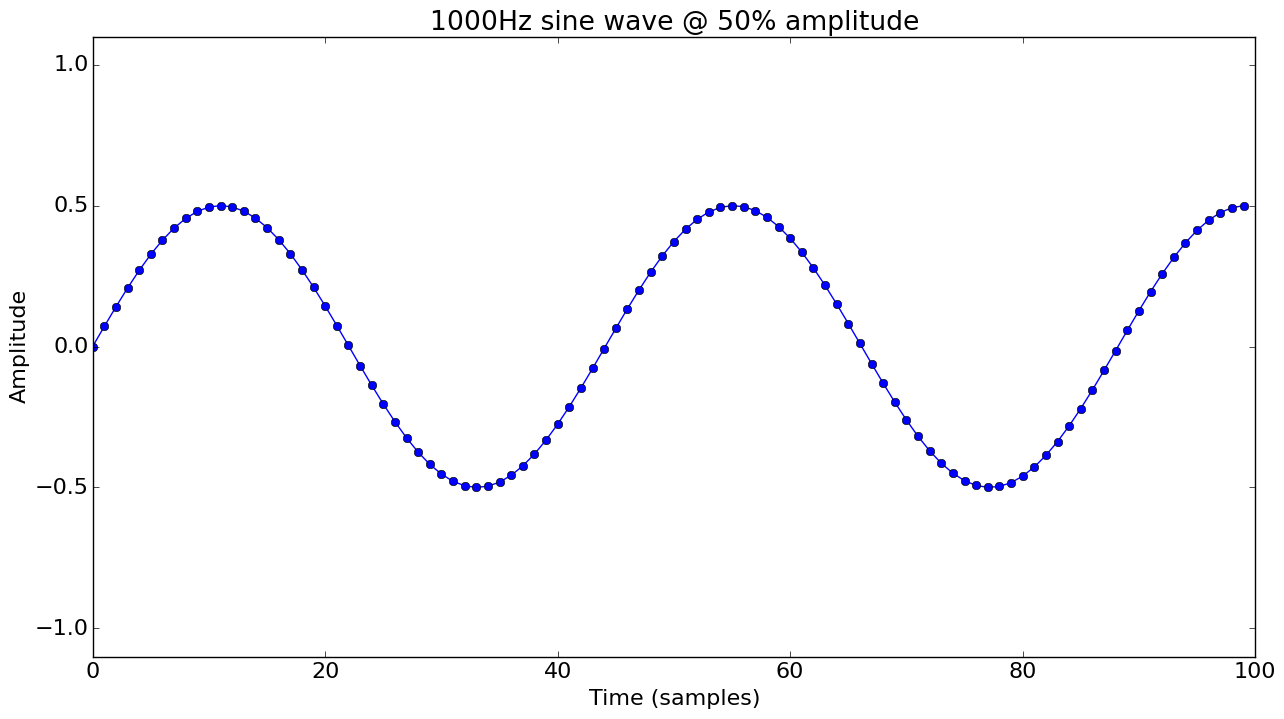

In [14]:
samples = samples * 0.50
plt.plot(samples[0:100], marker='o')
plt.ylim([-1.1, 1.1])
plt.title('1000Hz sine wave @ 50% amplitude')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

## Write audio data to a wave file

Now we are going to write our amplitude reduced samples to a new wave file

First we need to convert the samples back to the int16 format between -32768 and +32767

In [15]:
samples = np.int16(samples * 32768)
print 'Sample data type is now: ', samples.dtype

Sample data type is now:  int16


Write the sample data the new file using the same sample rate as the original (44100Hz)

In [16]:
wavfile.write('audio/1k_0.5.wav', fs, samples)

## Generating audio data 

When working with audio you usually have to generate signals for various reasons such as when designing test signals for measurements

We will start by creating 1 second of white noise (noise with constant energy across all frequency bands)

We will be using a sample rate of 44,100Hz

In [127]:
fs = 44100

The signals duration will be 3 seconds and it will have an amplitude of 1.0

In [128]:
dur = 3
A = 1.0
sample_len = dur * fs

This preallocates our noise array, ready for filling

In [129]:
noise_samples = np.zeros(sample_len)

Then we will create an array of floating point numbers between -1 and +1, by generating each sample individually from a random number

In [130]:
for i in range(sample_len):
    noise_samples[i] = A * np.random.uniform(-1, 1)

Plot the first 1000 samples of white noise to see it in the time domain

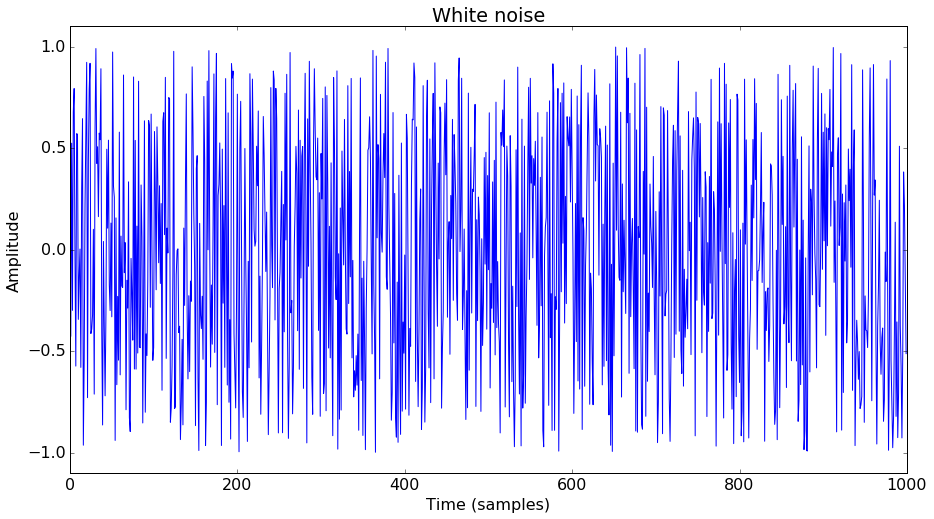

In [131]:
plt.plot(noise_samples[0:1000])
plt.ylim([-1.1, 1.1])
plt.title('White noise')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

Convert the random samples to 16bit signed integers

In [132]:
noise_samples = np.int16(noise_samples * 32768)

Write the random samples to disk

In [133]:
wavfile.write('audio/white_noise.wav', fs, noise_samples)

Next we will create a sine wave

We will start by defining its characteristics

It will be sampled at 44,100Hz, have a duration of 3 seconds, a frequency of 440Hz and an amplitude of 1.0

In [134]:
fs = 44100
dur = 3
freq = 440
A = 1.0

Store a value for the resultant signals total length

In [135]:
sample_len = dur * fs

Preallocate an empty array to store our sine wave

In [136]:
sine_samples = np.zeros(sample_len)

Create an array containing an ascending number of float values between 0 and 3 seconds with intervals of 1/fs (our sampling interval)

In [137]:
T = np.linspace(0, dur, num=sample_len)

Loop through the empty array, filling it with an oscillating sine wave

In [138]:
for i in range(sample_len):
    sine_samples[i] = A * np.sin(2 * np.pi * freq * T[i])

Plot the first 100 samples, but this time we are going to display time in milliseconds on the x axis. Note the lower frequency than the previous sine wave

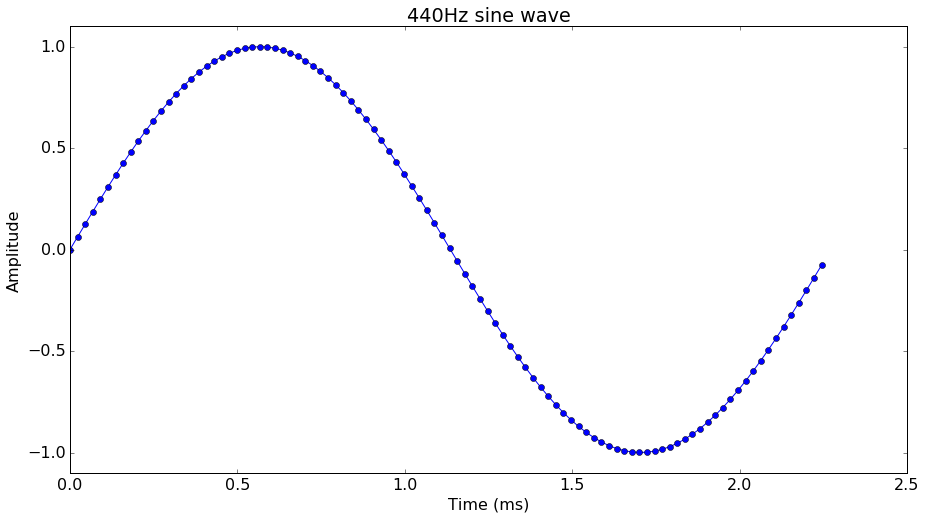

In [139]:
plt.plot(T[0:100]*1000, sine_samples[0:100], marker='o')
plt.ylim([-1.1, 1.1])
plt.title('440Hz sine wave')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

Convert the float values to int16 ready for wave file write

In [140]:
sine_samples = np.int16(sine_samples * 32768)

Write the sample data to wave file

In [141]:
wavfile.write('audio/440.wav', fs, sine_samples)

## Combining audio data

Next we are going to combine 2 audio signals to make a more complex waveform

This will be created by the addition of our white noise and sine wave signals

This is performed very easily by adding the 2 signals together

First we recreate our noise signal, but this time with a 50% amplitude multiplier to reduce its influence on the resultant waveform

In [142]:
fs = 44100
dur = 3
A = 0.5
sample_len = dur * fs
noise_samples = np.zeros(sample_len)

for i in range(sample_len):
    noise_samples[i] = np.random.uniform(-1, 1)

Now we recreate our 440Hz sine wave

In [143]:
fs = 44100
dur = 3
freq = 440
A = 1.0

sine_samples = np.zeros(sample_len)
T = np.linspace(0, dur, num=sample_len)

for i in range(sample_len):
    sine_samples[i] = A * np.sin(2 * np.pi * freq * T[i])

Then we combine them

In [144]:
comb_samples = noise_samples + sine_samples

Now plot the resultant signal to see how it looks, but change the plot scale because the combination of signals will lead to amplitude changes

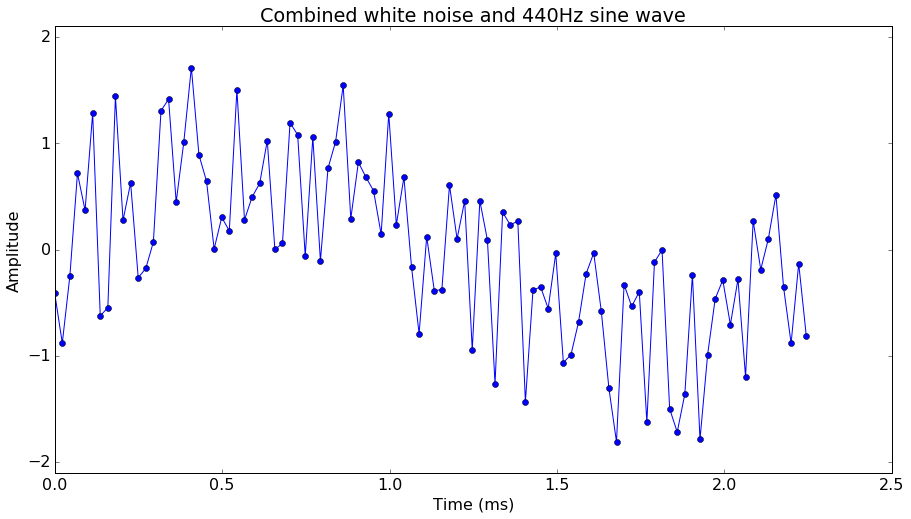

In [145]:
plt.plot(T[0:100]*1000, comb_samples[0:100], marker='o')
plt.ylim([-2.1, 2.1])
plt.title('Combined white noise and 440Hz sine wave')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

You can clearly see the 440Hz sine wave present in the signal, but with the white noise at 50% amplitude overlaid

The addition of the 2 signals has also increased the resultant signals amplitude to around 2.0. This is above our maximum amplitude value so we must "normalize" this signal back to the permissable -1.0 to +1.0 range

We do this by dividing the entire combined signal with its maximum value, normalizing the values down to a range with maximum and minimum values of -1 and +1

In [146]:
comb_samples = comb_samples / np.max(comb_samples)

Now plot

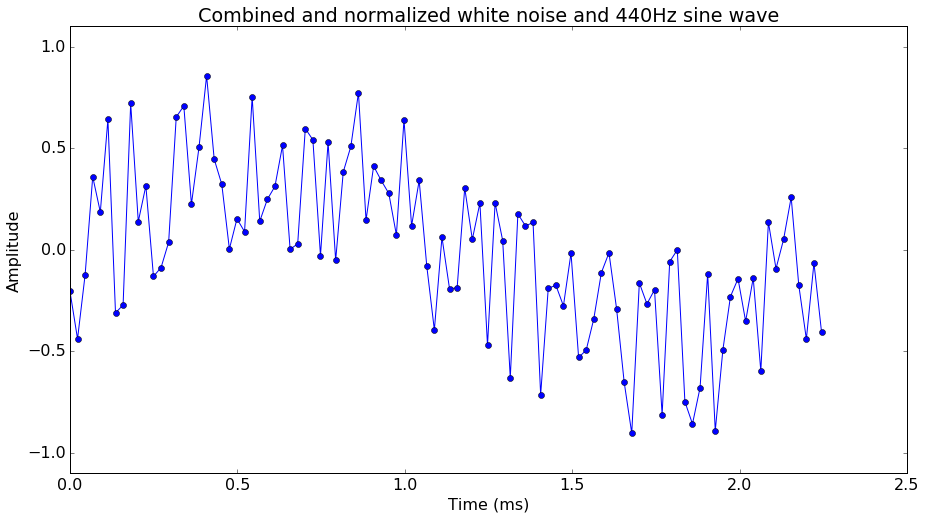

In [147]:
plt.plot(T[0:100]*1000, comb_samples[0:100], marker='o')
plt.ylim([-1.1, 1.1])
plt.title('Combined and normalized white noise and 440Hz sine wave')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

And save our combined file by first coverting to 16 bit integers

In [148]:
comb_samples = np.int16(comb_samples * 32768)

In [149]:
wavfile.write('audio/440_noise.wav', fs, comb_samples)

This is called the superposition principle and forms the basis of additive synthesis and inversely, Fourier's Theorem, which opens the doors to Fourier analysis 

## Objective audio features primer

In acoustics and especially in policy formation/enforcement we like to reduce audio signals down to easy to interprete values

A standard measure of average signal amplitude over time is the Root Mean Squared (RMS)

It represents the arithmetic mean of the amplitude squared of each discrete point of a waveform and is described by the following equation:

\begin{equation*} x_{rms} = \sqrt{\frac{1}{n}(x_1^2 + x_2^2 \dots + x_n^2)} \end{equation*}